# Spotify Data Clustering Using K-Means

## 01 Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime
import os 
import sklearn
from sklearn.cluster import KMeans
import pylab as pl
%matplotlib inline 

In [2]:
path = '/Users/brookecoffey/Desktop/DataAnalyticsTy/Achievement 6 /Spotify Project'

In [3]:
df = pd.read_pickle(os.path.join(path, '01 Data', '02 Prepared Data', 'no_podcasts.pkl'))

In [4]:
df.shape

(169482, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169482 entries, 0 to 173284
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   ts                                 169482 non-null  datetime64[ns]
 1   platform                           169482 non-null  object        
 2   ms_played                          169482 non-null  int64         
 3   conn_country                       169482 non-null  object        
 4   master_metadata_track_name         169482 non-null  object        
 5   master_metadata_album_artist_name  169482 non-null  object        
 6   master_metadata_album_album_name   169482 non-null  object        
 7   spotify_track_uri                  169482 non-null  object        
 8   episode_name                       0 non-null       object        
 9   episode_show_name                  0 non-null       object        
 10  spotify_episode_uri 

In [6]:
df.head()

,ts,platform,ms_played,conn_country,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,...,region,minutes_seconds,year,month,day_of_week,hour_of_day,skipped_ratio,skip_prob,count_y,listening_frequency
0,2012-07-17 02:48:23,"iOS 5.1.1 (iPod4,1)",231177,US,It's Time,Imagine Dragons,Continued Silence EP,spotify:track:40xtweuHBkLXNMO3xCK5AZ,NaN,NaN,...,Pennsylvania,03:51,2012,7,1,2,inf,very likely to be skipped,3.0,Low Frequency
1,2012-07-17 22:26:20,"iOS 5.1.1 (iPod4,1)",25727,US,Jump (feat. Nelly Furtado),Flo Rida,R.O.O.T.S. (Route of Overcoming the Struggle),spotify:track:4uGucgzv0ydi35DgAlsTQ4,NaN,NaN,...,Pennsylvania,00:25,2012,7,1,22,NaN,fwdbtn,1.0,Only Played Once
2,2012-07-17 22:26:23,"iOS 5.1.1 (iPod4,1)",3436,US,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,spotify:track:5RzFJd6W40SDTyZkX6xx45,NaN,NaN,...,Pennsylvania,00:03,2012,7,1,22,2.0,very likely to be skipped,5.0,Low Frequency
3,2012-07-17 22:26:24,"iOS 5.1.1 (iPod4,1)",1532,US,Over And Over,Nelly,6 Pack,spotify:track:2Gfr96HuhYqGcteLv9XUJP,NaN,NaN,...,Pennsylvania,00:01,2012,7,1,22,NaN,fwdbtn,1.0,Only Played Once
4,2012-07-17 22:26:26,"iOS 5.1.1 (iPod4,1)",1486,US,Pause,Pitbull,Planet Pit (Deluxe Version),spotify:track:0c7wqpBLOTFr1yb70LHGFM,NaN,NaN,...,Pennsylvania,00:01,2012,7,1,22,NaN,fwdbtn,1.0,Only Played Once


In [7]:
df.columns

Index(['ts', 'platform', 'ms_played', 'conn_country',
       'master_metadata_track_name', 'master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped_x', 'offline', 'latitude',
       'longitude', 'region', 'minutes_seconds', 'year', 'month',
       'day_of_week', 'hour_of_day', 'skipped_ratio', 'skip_prob', 'count_y',
       'listening_frequency'],
      dtype='object')

In [8]:
# Dropping categorical information for Kmeans clustering 
df_no_cat = df.drop(columns=['platform','conn_country','master_metadata_album_artist_name',
       'master_metadata_album_album_name', 'spotify_track_uri', 'episode_name',
       'episode_show_name', 'spotify_episode_uri', 'reason_start',
       'reason_end', 'shuffle', 'skipped_x', 'offline', 'latitude',
       'longitude', 'region', 'minutes_seconds', 'year', 'month',
       'day_of_week', 'hour_of_day', 'skipped_ratio', 'skip_prob', 'count_y',
       'listening_frequency'])

In [9]:
# Turning data into weekly data again for clustering analysis 

In [10]:
# Group by week and count the total number of tracks played in each week
tracks_played = df_no_cat.groupby(pd.Grouper(key='ts', freq='W')).size()

# Group by week and sum the milliseconds played in each week
ms_played = df_no_cat.groupby(pd.Grouper(key='ts', freq='W'))['ms_played'].sum()

# Concatenate the two Series into a single DataFrame
result_df = pd.concat([tracks_played, ms_played], axis=1)
result_df.columns = ['Total Tracks Played', 'Total Milliseconds Played']

# Display the aggregated data with week
print(result_df)

            Total Tracks Played  Total Milliseconds Played
ts                                                        
2012-07-22                  289                    4888728
2012-07-29                    6                      19594
2012-08-05                   21                    2211644
2012-08-12                    4                     335259
2012-08-19                   65                    5859256
...                         ...                        ...
2023-07-30                  579                   49525838
2023-08-06                  265                   65626116
2023-08-13                  367                   61990298
2023-08-20                  592                   82483378
2023-08-27                  545                   42746412

[580 rows x 2 columns]


In [11]:
# turning milliseconds into minutes for easier scaling 
result_df['minutes_played'] = result_df['Total Milliseconds Played'] / 60000

In [12]:
result_df = result_df.drop(columns='Total Milliseconds Played')

In [13]:
result_df

,Total Tracks Played,minutes_played
ts,,
2012-07-22,289,81.478800
2012-07-29,6,0.326567
2012-08-05,21,36.860733
2012-08-12,4,5.587650
2012-08-19,65,97.654267
...,...,...
2023-07-30,579,825.430633
2023-08-06,265,1093.768600
2023-08-13,367,1033.171633


## 03 Applying Elbow Technique to Determine Number of Clusters

In [14]:
num_cl = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [15]:
score = [kmeans[i].fit(result_df).score(result_df) for i in range(len(kmeans))]

score

/Users/brookecoffey/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/brookecoffey/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/brookecoffey/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/brookecoffey/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

[-397582215.0284127,
 -122752648.36128366,
 -56534244.461624905,
 -35776952.755222626,
 -26065031.65122527,
 -21146685.594982922,
 -17276594.18246173,
 -14803517.6040495,
 -12792090.598677294]

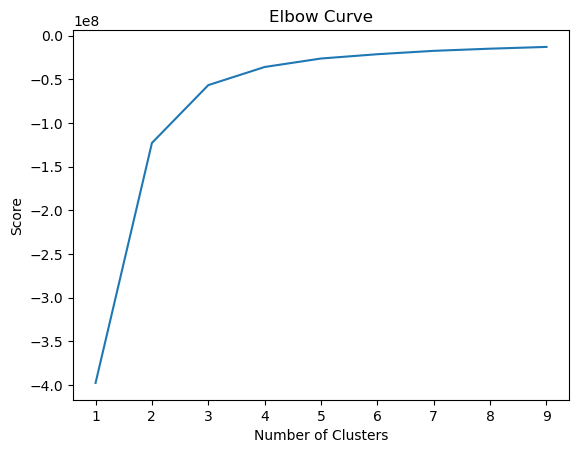

In [16]:
# plotting the elbow curve using PyLab.
pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

###  Based on the output above, it seems that the ideal number of clusters is 4, as that's where the curve straightens out

## 04 KMeans Clustering 

In [17]:
# Create the kmeans object. 
kmeans = KMeans(n_clusters = 4)

In [18]:
kmeans.fit(result_df)

/Users/brookecoffey/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [19]:
result_df['clusters'] = kmeans.fit_predict(result_df)

/Users/brookecoffey/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
result_df.head()

,Total Tracks Played,minutes_played,clusters
ts,,,
2012-07-22,289,81.478800,2
2012-07-29,6,0.326567,2
2012-08-05,21,36.860733,2
2012-08-12,4,5.587650,2
2012-08-19,65,97.654267,2


In [21]:
result_df['clusters'].value_counts()

2    279
1    176
3    100
0     25
Name: clusters, dtype: int64

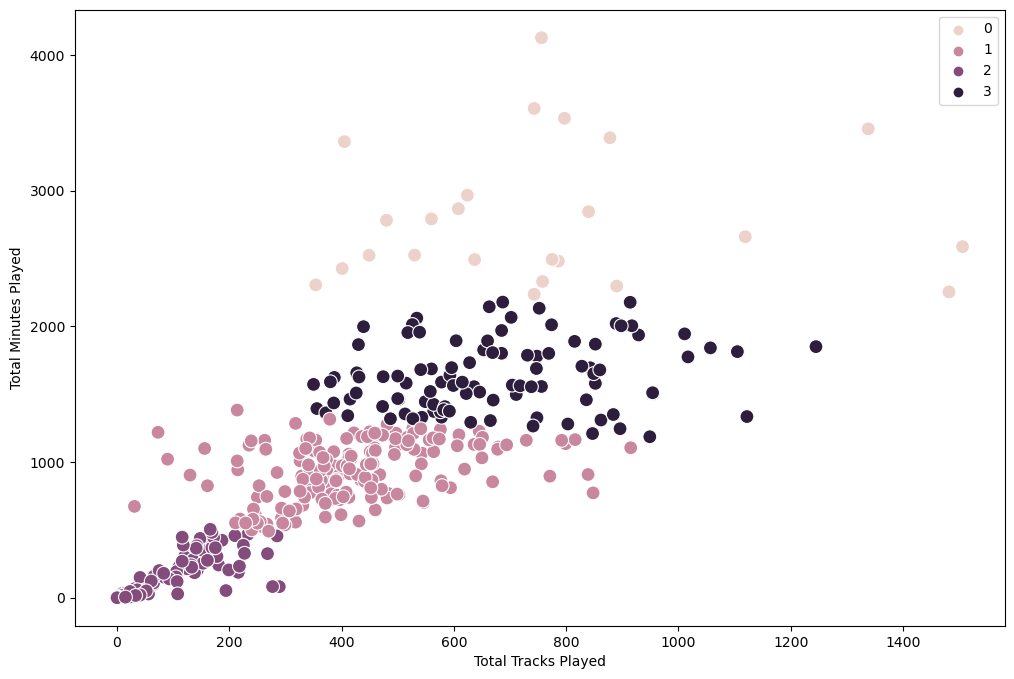

In [22]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=result_df['Total Tracks Played'], y=result_df['minutes_played'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Total Tracks Played')
plt.ylabel('Total Minutes Played')
plt.show()

In [23]:
result_df.loc[result_df['clusters'] == 3, 'cluster'] = 'black'
result_df.loc[result_df['clusters'] == 2, 'cluster'] = 'purple'
result_df.loc[result_df['clusters'] == 1, 'cluster'] = 'pink'
result_df.loc[result_df['clusters'] == 0, 'cluster'] = 'light pink'

In [24]:
result_df.groupby('cluster').agg({'Total Tracks Played':['mean', 'median'], 
                         'minutes_played':['mean', 'median']})

Total Tracks Played        minutes_played             
                          mean median           mean       median
cluster                                                          
black               673.000000  649.5    1626.271579  1585.012517
light pink          760.720000  743.0    2805.138277  2660.013433
pink                419.068182  405.5     925.167733   939.761592
purple               33.720430    0.0      58.287113     0.000000

In [25]:
result_df

,Total Tracks Played,minutes_played,clusters,cluster
ts,,,,
2012-07-22,289,81.478800,2,purple
2012-07-29,6,0.326567,2,purple
2012-08-05,21,36.860733,2,purple
2012-08-12,4,5.587650,2,purple
2012-08-19,65,97.654267,2,purple
...,...,...,...,...
2023-07-30,579,825.430633,1,pink
2023-08-06,265,1093.768600,1,pink
2023-08-13,367,1033.171633,1,pink


### Preparing both datasets to merge column data for each record back into full data set

In [26]:
result_df.reset_index(inplace=True)

In [27]:
result_df.rename(columns={'ts' : 'week'}, inplace=True)

In [28]:
result_df['week'] = result_df['week'].astype(str)

In [29]:
df['week'] = df['ts'].dt.to_period('W')

In [30]:
df['week'].head()

0    2012-07-16/2012-07-22
1    2012-07-16/2012-07-22
2    2012-07-16/2012-07-22
3    2012-07-16/2012-07-22
4    2012-07-16/2012-07-22
Name: week, dtype: period[W-SUN]

In [31]:
df['week'] = df['week'].astype(str)

In [32]:
df['week'] = df['week'].str[-10:]

In [33]:
df['week'].head()

0    2012-07-22
1    2012-07-22
2    2012-07-22
3    2012-07-22
4    2012-07-22
Name: week, dtype: object

In [34]:
# merging the clusters back into the original dataset
merged_df = df.merge(result_df[['week', 'cluster']], on='week', how='left')

In [35]:
merged_df.head()

,ts,platform,ms_played,conn_country,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,...,year,month,day_of_week,hour_of_day,skipped_ratio,skip_prob,count_y,listening_frequency,week,cluster
0,2012-07-17 02:48:23,"iOS 5.1.1 (iPod4,1)",231177,US,It's Time,Imagine Dragons,Continued Silence EP,spotify:track:40xtweuHBkLXNMO3xCK5AZ,NaN,NaN,...,2012,7,1,2,inf,very likely to be skipped,3.0,Low Frequency,2012-07-22,purple
1,2012-07-17 22:26:20,"iOS 5.1.1 (iPod4,1)",25727,US,Jump (feat. Nelly Furtado),Flo Rida,R.O.O.T.S. (Route of Overcoming the Struggle),spotify:track:4uGucgzv0ydi35DgAlsTQ4,NaN,NaN,...,2012,7,1,22,NaN,fwdbtn,1.0,Only Played Once,2012-07-22,purple
2,2012-07-17 22:26:23,"iOS 5.1.1 (iPod4,1)",3436,US,I Know You Want Me (Calle Ocho),Pitbull,Pitbull Starring In Rebelution,spotify:track:5RzFJd6W40SDTyZkX6xx45,NaN,NaN,...,2012,7,1,22,2.0,very likely to be skipped,5.0,Low Frequency,2012-07-22,purple
3,2012-07-17 22:26:24,"iOS 5.1.1 (iPod4,1)",1532,US,Over And Over,Nelly,6 Pack,spotify:track:2Gfr96HuhYqGcteLv9XUJP,NaN,NaN,...,2012,7,1,22,NaN,fwdbtn,1.0,Only Played Once,2012-07-22,purple
4,2012-07-17 22:26:26,"iOS 5.1.1 (iPod4,1)",1486,US,Pause,Pitbull,Planet Pit (Deluxe Version),spotify:track:0c7wqpBLOTFr1yb70LHGFM,NaN,NaN,...,2012,7,1,22,NaN,fwdbtn,1.0,Only Played Once,2012-07-22,purple


In [36]:
merged_df['cluster'].isnull().sum()

0

In [37]:
merged_df.shape

(169482, 30)

In [38]:
merged_df.to_csv(os.path.join(path,'01 Data','02 Prepared Data','df_7.csv'))